In [1]:
import os
import pandas as pd
path = r"C:\Users\Wong\Desktop\Dissertation\Imputed_dataset"
Albermarle_rainfall = pd.read_csv(os.path.join(path, 'Albermarle_rainfall.csv'))
Stamfordham_water = pd.read_csv(os.path.join(path, 'Stamfordham.csv'))

In [2]:
Albermarle_rainfall['dateTime'] = pd.to_datetime(Albermarle_rainfall['dateTime'])
Stamfordham_water['dateTime'] = pd.to_datetime(Stamfordham_water['dateTime'])

In [3]:
Stamfordham_water.set_index('dateTime', inplace=True)
Albermarle_rainfall.set_index('dateTime', inplace=True)

In [5]:
start_date = pd.to_datetime('11/03/2020 00:00:00', format='%d/%m/%Y %H:%M:%S')
end_date = pd.to_datetime('05/09/2023 00:00:00', format='%d/%m/%Y %H:%M:%S')
Stamfordham_water_subset = Stamfordham_water.loc[(Stamfordham_water.index >= start_date) & (Stamfordham_water.index <= end_date)]
Albermarle_rainfall_subset = Albermarle_rainfall.loc[(Albermarle_rainfall.index >= start_date) & (Albermarle_rainfall.index <= end_date)]

In [6]:
Albermarle_rainfall_subset.shape

(122209, 1)

In [8]:
Stamfordham_water_subset.shape

(122209, 1)

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
merged_data = pd.merge(Albermarle_rainfall_subset, Stamfordham_water_subset, on='dateTime', how='inner')

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_data = scaler.fit_transform(merged_data)

In [12]:
train_data = merged_data[:97767]
test_data = merged_data[97767:]

In [13]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
lr_Stamfordham_96in_48out = LinearRegression()
cv_scores_Stamfordham_96in_48out_lr = cross_val_score(lr_Stamfordham_96in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [15]:
cv_scores_Stamfordham_96in_48out_lr = -cv_scores_Stamfordham_96in_48out_lr
print("Cross-validation scores:")
print(cv_scores_Stamfordham_96in_48out_lr)
print("Mean MSE:", cv_scores_Stamfordham_96in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Stamfordham_96in_48out_lr.std())

Cross-validation scores:
[0.00340152 0.00038915 0.00117703 0.00033279 0.00056908]
Mean MSE: 0.0011739153164225472
Standard Deviation MSE: 0.0011533778048709153


In [16]:
window_size = 48
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [17]:
lr_Stamfordham_48in_48out = LinearRegression()
cv_scores_Stamfordham_48in_48out_lr = cross_val_score(lr_Stamfordham_48in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [18]:
cv_scores_Stamfordham_48in_48out_lr = -cv_scores_Stamfordham_48in_48out_lr
print("Cross-validation scores:")
print(cv_scores_Stamfordham_48in_48out_lr)
print("Mean MSE:", cv_scores_Stamfordham_48in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Stamfordham_48in_48out_lr.std())

Cross-validation scores:
[0.00306333 0.00039295 0.00121668 0.00034919 0.00058459]
Mean MSE: 0.0011213490171022686
Standard Deviation MSE: 0.0010193415956771276


In [19]:
window_size = 24
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [20]:
lr_Stamfordham_24in_48out = LinearRegression()
cv_scores_Stamfordham_24in_48out_lr = cross_val_score(lr_Stamfordham_24in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [21]:
cv_scores_Stamfordham_24in_48out_lr = -cv_scores_Stamfordham_24in_48out_lr
print("Cross-validation scores:")
print(cv_scores_Stamfordham_24in_48out_lr)
print("Mean MSE:", cv_scores_Stamfordham_24in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Stamfordham_24in_48out_lr.std())

Cross-validation scores:
[0.0031106  0.00040198 0.00122984 0.00034823 0.00060602]
Mean MSE: 0.001139334591276521
Standard Deviation MSE: 0.0010342177164215397


Now try the different window size 24,48,96 for 32output

In [22]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [23]:
lr_Stamfordham_96in_32out = LinearRegression()
cv_scores_Stamfordham_96in_32out_lr = cross_val_score(lr_Stamfordham_96in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [24]:
cv_scores_Stamfordham_96in_32out_lr = -cv_scores_Stamfordham_96in_32out_lr
print("Cross-validation scores:")
print(cv_scores_Stamfordham_96in_32out_lr)
print("Mean MSE:", cv_scores_Stamfordham_96in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Stamfordham_96in_32out_lr.std())

Cross-validation scores:
[0.00132212 0.00019584 0.00050303 0.00015333 0.00024118]
Mean MSE: 0.0004830998826202463
Standard Deviation MSE: 0.00043683929159070835


In [25]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [26]:
lr_Stamfordham_48in_32out = LinearRegression()
cv_scores_Stamfordham_48in_32out_lr = cross_val_score(lr_Stamfordham_48in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [27]:
cv_scores_Stamfordham_48in_32out_lr = -cv_scores_Stamfordham_48in_32out_lr
print("Cross-validation scores:")
print(cv_scores_Stamfordham_48in_32out_lr)
print("Mean MSE:", cv_scores_Stamfordham_48in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Stamfordham_48in_32out_lr.std())

Cross-validation scores:
[0.00119911 0.00019855 0.00051858 0.00015934 0.00024619]
Mean MSE: 0.00046435497760624644
Standard Deviation MSE: 0.0003883498567726801


In [28]:
window_size = 24
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [29]:
lr_Stamfordham_24in_32out = LinearRegression()
cv_scores_Stamfordham_24in_32out_lr = cross_val_score(lr_Stamfordham_24in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [30]:
cv_scores_Stamfordham_24in_32out_lr = -cv_scores_Stamfordham_24in_32out_lr
print("Cross-validation scores:")
print(cv_scores_Stamfordham_24in_32out_lr)
print("Mean MSE:", cv_scores_Stamfordham_24in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Stamfordham_24in_32out_lr.std())

Cross-validation scores:
[0.00123479 0.00020299 0.00051536 0.0001577  0.00025246]
Mean MSE: 0.00047266128003439973
Standard Deviation MSE: 0.0004007683381963236


Now try the different window size 24,48,96 for 16output

In [31]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [32]:
lr_Stamfordham_96in_16out = LinearRegression()
cv_scores_Stamfordham_96in_16out_lr = cross_val_score(lr_Stamfordham_96in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [36]:
cv_scores_Stamfordham_96in_16out_lr = -cv_scores_Stamfordham_96in_16out_lr
print("Cross-validation scores:")
print(cv_scores_Stamfordham_96in_16out_lr)
print("Mean MSE:", cv_scores_Stamfordham_96in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Stamfordham_96in_16out_lr.std())

Cross-validation scores:
[2.75102098e-04 5.48817275e-05 1.20419158e-04 3.32842890e-05
 5.42581406e-05]
Mean MSE: 0.00010758908263152952
Standard Deviation MSE: 8.873407251948606e-05


In [37]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [38]:
lr_Stamfordham_48in_16out = LinearRegression()
cv_scores_Stamfordham_48in_16out_lr = cross_val_score(lr_Stamfordham_48in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [39]:
cv_scores_Stamfordham_48in_16out_lr = -cv_scores_Stamfordham_48in_16out_lr
print("Cross-validation scores:")
print(cv_scores_Stamfordham_48in_16out_lr)
print("Mean MSE:", cv_scores_Stamfordham_48in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Stamfordham_48in_16out_lr.std())

Cross-validation scores:
[2.43233818e-04 5.59676458e-05 1.22885295e-04 3.38941802e-05
 5.48159474e-05]
Mean MSE: 0.00010215937729908744
Standard Deviation MSE: 7.66378172283961e-05


In [40]:
window_size = 24
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [41]:
lr_Stamfordham_24in_16out = LinearRegression()
cv_scores_Stamfordham_24in_16out_lr = cross_val_score(lr_Stamfordham_24in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [44]:
cv_scores_Stamfordham_24in_16out_lr = -cv_scores_Stamfordham_24in_16out_lr
print("Cross-validation scores:")
print(cv_scores_Stamfordham_24in_16out_lr)
print("Mean MSE:", cv_scores_Stamfordham_24in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Stamfordham_24in_16out_lr.std())

Cross-validation scores:
[2.52724409e-04 5.67697626e-05 1.18837043e-04 3.38605468e-05
 5.54697438e-05]
Mean MSE: 0.00010353230111812867
Standard Deviation MSE: 7.980403244531053e-05


Now try the different window size 24,48,96 for 8output

In [45]:
window_size = 96
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [46]:
lr_Stamfordham_96in_8out = LinearRegression()
cv_scores_Stamfordham_96in_8out_lr = cross_val_score(lr_Stamfordham_96in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [47]:
cv_scores_Stamfordham_96in_8out_lr = -cv_scores_Stamfordham_96in_8out_lr
print("Cross-validation scores:")
print(cv_scores_Stamfordham_96in_8out_lr)
print("Mean MSE:", cv_scores_Stamfordham_96in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Stamfordham_96in_8out_lr.std())

Cross-validation scores:
[5.97554936e-05 1.81743875e-05 3.29523453e-05 8.66572017e-06
 1.32409616e-05]
Mean MSE: 2.6557781619343918e-05
Standard Deviation MSE: 1.8497153184398467e-05


In [48]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [49]:
lr_Stamfordham_48in_8out = LinearRegression()
cv_scores_Stamfordham_48in_8out_lr = cross_val_score(lr_Stamfordham_48in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [50]:
cv_scores_Stamfordham_48in_8out_lr = -cv_scores_Stamfordham_48in_8out_lr
print("Cross-validation scores:")
print(cv_scores_Stamfordham_48in_8out_lr)
print("Mean MSE:", cv_scores_Stamfordham_48in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Stamfordham_48in_8out_lr.std())

Cross-validation scores:
[5.15474062e-05 1.84378330e-05 3.31742654e-05 8.68876021e-06
 1.33085387e-05]
Mean MSE: 2.503136070286211e-05
Standard Deviation MSE: 1.5603764413025624e-05


In [51]:
window_size = 24
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [52]:
lr_Stamfordham_24in_8out = LinearRegression()
cv_scores_Stamfordham_24in_8out_lr = cross_val_score(lr_Stamfordham_24in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [53]:
cv_scores_Stamfordham_24in_8out_lr = -cv_scores_Stamfordham_24in_8out_lr
print("Cross-validation scores:")
print(cv_scores_Stamfordham_24in_8out_lr)
print("Mean MSE:", cv_scores_Stamfordham_24in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Stamfordham_24in_8out_lr.std())

Cross-validation scores:
[5.36673386e-05 1.86019761e-05 3.23139614e-05 8.69422629e-06
 1.33454219e-05]
Mean MSE: 2.5324584857283307e-05
Standard Deviation MSE: 1.623222545689894e-05


In [ ]:
cv_scores_Stamfordham_48in_48out_lr

In [ ]:
cv_scores_Stamfordham_48in_32out_lr

In [ ]:
cv_scores_Stamfordham_48in_16out_lr

In [ ]:
lr_Stamfordham_48in_8out

In [54]:
window_size = 48
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [55]:
lr_Stamfordham_48in_48out_1 = LinearRegression()

In [56]:
lr_Stamfordham_48in_48out_1.fit(X_train, y_train)

LinearRegression()

In [57]:
pred_lr_Stamfordham_48in_48out = lr_Stamfordham_48in_48out_1.predict(X_test)

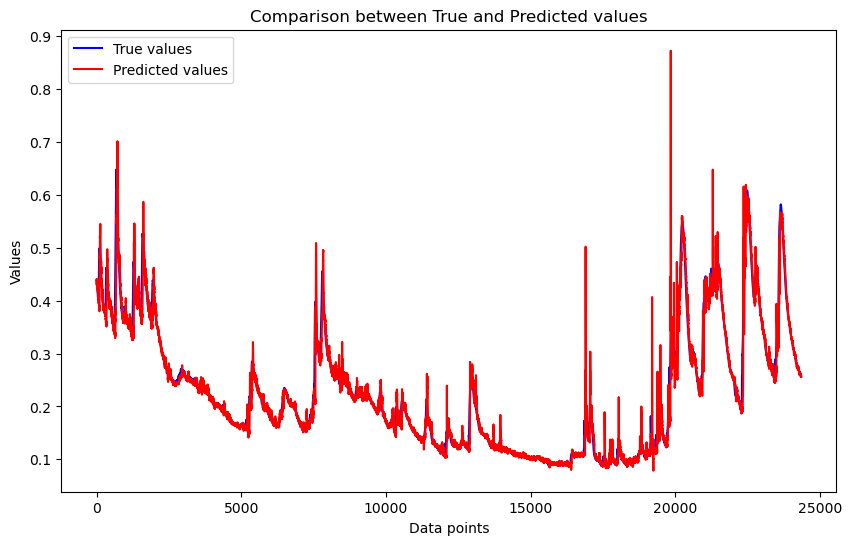

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Stamfordham_48in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [59]:
def nse(y_test, pred_lr_Stamfordham_48in_48out):
    numerator = np.sum((y_test - pred_lr_Stamfordham_48in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Stamfordham_48in_48out)
mae = mean_absolute_error(y_test, pred_lr_Stamfordham_48in_48out)
nse_value = nse(y_test, pred_lr_Stamfordham_48in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.000564141189066373
MAE: 0.011245695311297137
NSE: 0.9589442937255119


In [60]:
from joblib import dump
dump(lr_Stamfordham_48in_48out_1, 'lr_Stamfordham_48in_48out.joblib')

['lr_Stamfordham_48in_48out.joblib']

In [61]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [62]:
lr_Stamfordham_48in_32out = LinearRegression()
lr_Stamfordham_48in_32out.fit(X_train, y_train)

LinearRegression()

In [63]:
pred_lr_Stamfordham_48in_32out = lr_Stamfordham_48in_32out.predict(X_test)

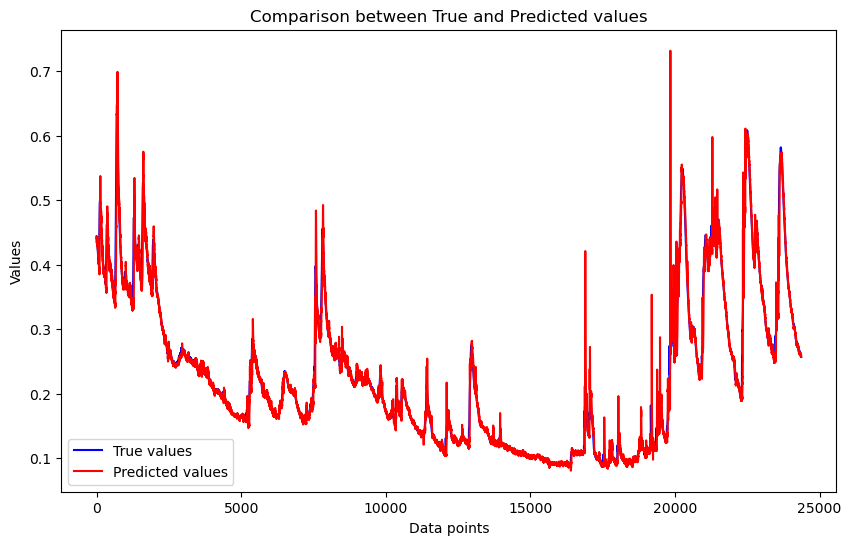

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Stamfordham_48in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [65]:
def nse(y_test, pred_lr_Stamfordham_48in_32out):
    numerator = np.sum((y_test - pred_lr_Stamfordham_48in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Stamfordham_48in_32out)
mae = mean_absolute_error(y_test, pred_lr_Stamfordham_48in_32out)
nse_value = nse(y_test, pred_lr_Stamfordham_48in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.00025587634899171827
MAE: 0.0071736952247966465
NSE: 0.9814068199473517


In [66]:
from joblib import dump
dump(lr_Stamfordham_48in_32out, 'lr_Stamfordham_48in_32out.joblib')

['lr_Stamfordham_48in_32out.joblib']

In [67]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [68]:
lr_Stamfordham_48in_16out = LinearRegression()
lr_Stamfordham_48in_16out.fit(X_train, y_train)

LinearRegression()

In [69]:
pred_lr_Stamfordham_48in_16out = lr_Stamfordham_48in_16out.predict(X_test)

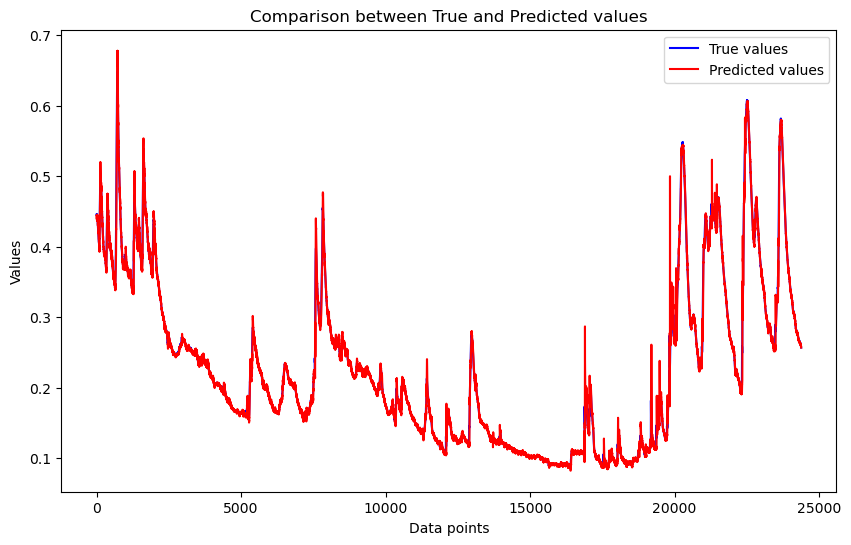

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Stamfordham_48in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [71]:
def nse(y_test, pred_lr_Stamfordham_48in_16out):
    numerator = np.sum((y_test - pred_lr_Stamfordham_48in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Stamfordham_48in_16out)
mae = mean_absolute_error(y_test, pred_lr_Stamfordham_48in_16out)
nse_value = nse(y_test, pred_lr_Stamfordham_48in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 6.52165596628667e-05
MAE: 0.0033187945313986372
NSE: 0.9952685642006235


In [72]:
from joblib import dump
dump(lr_Stamfordham_48in_16out, 'lr_Stamfordham_48in_16out.joblib')

['lr_Stamfordham_48in_16out.joblib']

In [73]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [74]:
lr_Stamfordham_48in_8out = LinearRegression()
lr_Stamfordham_48in_8out.fit(X_train, y_train)

LinearRegression()

In [75]:
pred_lr_Stamfordham_48in_8out = lr_Stamfordham_48in_8out.predict(X_test)

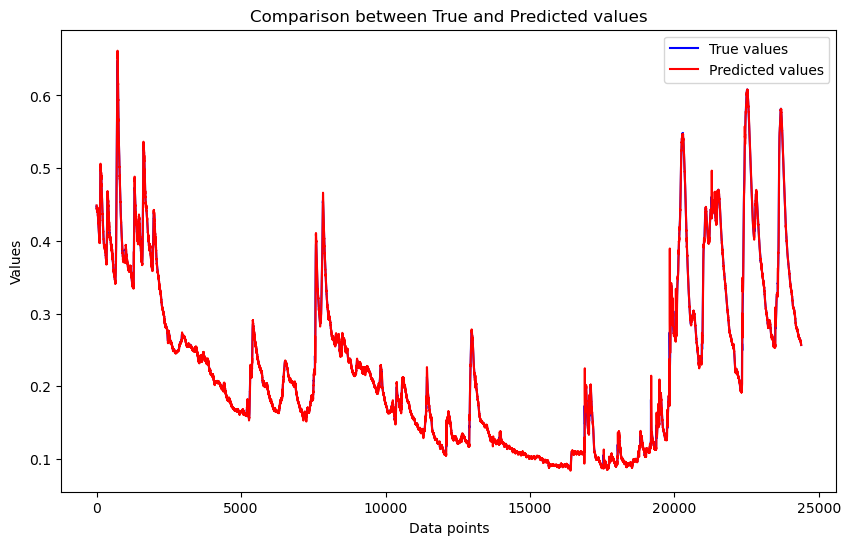

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Stamfordham_48in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [77]:
def nse(y_test, pred_lr_Stamfordham_48in_8out):
    numerator = np.sum((y_test - pred_lr_Stamfordham_48in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Stamfordham_48in_8out)
mae = mean_absolute_error(y_test, pred_lr_Stamfordham_48in_8out)
nse_value = nse(y_test, pred_lr_Stamfordham_48in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 1.785335443318897e-05
MAE: 0.0016321248383327337
NSE: 0.9987057877754423


In [78]:
dump(lr_Stamfordham_48in_8out, 'lr_Stamfordham_48in_8out.joblib')

['lr_Stamfordham_48in_8out.joblib']